# 스크래퍼 만들기

In [1]:
import requests
from bs4 import BeautifulSoup

import time 
import pandas as pd

https://search.dcinside.com/post/p/1/sort/latest/q/.EC.9D.B4.ED.98.BC.20.EC.83.81.EB.8B.B4
https://search.dcinside.com/post/p/6/sort/latest/q/.EC.9D.B4.ED.98.BC.20.EC.83.81.EB.8B.B4

In [2]:
url = 'https://search.dcinside.com/post/p/{}/sort/latest/q/.EC.9D.B4.ED.98.BC.20.EC.83.81.EB.8B.B4'

In [3]:
for page in range(1,51): 
    print(url.format(page))

https://search.dcinside.com/post/p/1/sort/latest/q/.EC.9D.B4.ED.98.BC.20.EC.83.81.EB.8B.B4
https://search.dcinside.com/post/p/2/sort/latest/q/.EC.9D.B4.ED.98.BC.20.EC.83.81.EB.8B.B4
https://search.dcinside.com/post/p/3/sort/latest/q/.EC.9D.B4.ED.98.BC.20.EC.83.81.EB.8B.B4
https://search.dcinside.com/post/p/4/sort/latest/q/.EC.9D.B4.ED.98.BC.20.EC.83.81.EB.8B.B4
https://search.dcinside.com/post/p/5/sort/latest/q/.EC.9D.B4.ED.98.BC.20.EC.83.81.EB.8B.B4
https://search.dcinside.com/post/p/6/sort/latest/q/.EC.9D.B4.ED.98.BC.20.EC.83.81.EB.8B.B4
https://search.dcinside.com/post/p/7/sort/latest/q/.EC.9D.B4.ED.98.BC.20.EC.83.81.EB.8B.B4
https://search.dcinside.com/post/p/8/sort/latest/q/.EC.9D.B4.ED.98.BC.20.EC.83.81.EB.8B.B4
https://search.dcinside.com/post/p/9/sort/latest/q/.EC.9D.B4.ED.98.BC.20.EC.83.81.EB.8B.B4
https://search.dcinside.com/post/p/10/sort/latest/q/.EC.9D.B4.ED.98.BC.20.EC.83.81.EB.8B.B4
https://search.dcinside.com/post/p/11/sort/latest/q/.EC.9D.B4.ED.98.BC.20.EC.83.81.EB.8B.

# 태그 찾기

![](https://velog.velcdn.com/images/hyejinbeck/post/a134fbbd-2402-492f-94ed-25bff8803678/image.png)
![](https://velog.velcdn.com/images/hyejinbeck/post/65ab0c60-7d9a-49d8-a9eb-d37299bc9d92/image.png)
![](https://velog.velcdn.com/images/hyejinbeck/post/f1b75eff-af3b-4cb6-93be-2aca783935a0/image.png)

게시글 제목 태그는 a.tit_txt <br>
게시글 내용 태그는 a.link_dsc_txt

# HTML 수집과 파싱

In [4]:
response = requests.get(url.format(1))
html = response.text
soup = BeautifulSoup(html, 'lxml')
print(soup)

<!DOCTYPE html>
<html class="darkmode" lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="kr" name="content-language"/>
<meta content="8_SyZg2Wg3LNnCmFXzETp7ld4yjZB8ny17m8QsYsLwk" name="google-site-verification"/>
<meta content="디시인사이드" name="author"/>
<meta content="디시인사이드 검색결과" name="title"/>
<meta content="디시인사이드 검색결과" name="description"/>
<meta content="website" property="og:type"/>
<meta content="디시인사이드 검색결과" property="og:title"/>
<meta content="디시인사이드 검색결과" property="og:description"/>
<meta content="https://nstatic.dcinside.com/dc/w/images/descrip_img.png" property="og:image"/>
<meta content="https://www.dcinside.com/" property="og:url"/>
<title>디시인사이드 검색결과</title>
<!--[if IE 7]>
	<link rel="stylesheet" type="text/css" href="https://nstatic.dcinside.com/dc/w/css/ie7.css"/>
	<![endif]-->
<script src="https://nstatic.dcinside.com/dgn/gallery/js/cross_domain.js" type="text/javascript"></script>
<!--[if lt IE 9]>
	<script s

In [5]:
def find_titles(soup): 
    """게시물 제목을 수집"""
    title_soup = soup.select('a.tit_txt')
    titles = [title.text for title in title_soup]
    return titles

titles = find_titles(soup)
titles[:3]

['호선좌 상담 끝나고 남편 불러서 이혼하라 했을듯', '그냥 너무 모순적이잖아', '마인드컨트롤 씨게 당해서 헤어나올수없는거같다']

In [6]:
def find_content(soup): 
    """게시물 본문과 게시판&작성일을 수집"""
    content_soup = soup.select('p.link_dsc_txt')
    contents = [content.text for content in content_soup]

    contents_text = []                           # 게시물 본문만 수집 
    etc = []                                     # 그 외 나머지 (게시판명과 작성일을 수집) 
    for idx, content in enumerate(contents):     # enumerate함수로 하나씩 조건문으로 추출 (0, '첫번째값'), (1, '두번째값') 이렇게 추출됨 
        if idx % 2 == 0 :                        # 인덱스를 2로 나누어서 0이 된다면 == 짝수라면 게시물 본문에 수집 
            contents_text.append(content)        
        else:                                    # 인덱스를 2로 나누어서 0이 안된다면 == 홀수라면 그 외 나머지 (게시판명과 작성일)에 수집 
            etc.append(content) 
    return contents_text, etc                    # 이렇게 게시물본문 / 게시판&작성일로 나누어서 별개로 저장 

contents_text, etc = find_content(soup) 

print(contents_text[:6])
print(etc[:6])

['이건 호불호의 영역이 아님 구제해줘야하는 부분임', '이혼하고 싶다고 그러면서 이혼 안하고(할 맘 있으면 1초라도 빠르게 아들 데리고 변호사 상담하고 새벽에 야반도주 했을거임) 자식 얘기하지만 자식은 정작 아빠 더 좋아하고 돈돈 거리지만 일은 안나가고...', '자존감,자립심 심어주기에 정신적성숙도가 떨어지고 꾸준한 상담과 치료가 필요해보이는데 현실적으론 불가능할듯 이혼하면 당장은 피하겠지만 그뒤에도 걱정된다 뭐 방송끝나면 별관심없겠지만 방송에서도...', '선택이 이혼일 때가 있는데 그걸 모르는 듯.. -절약 아내- 예민해도 너무 예민함, 나라면 카메라 앞에서 조금이라도 유연하게 말 했을 듯.. 서장훈이 말한 것 처럼 깡이 좋은 건지 아니면 아들 두고 세상 떠나도...', '남편가족은 이혼시키고 좀 미안하지만 약간은 부족할수있는 이 젊은 남자가 앞으로 살아갈 밥벌이나 기본 일상생활이나 사람대 사람으로 살아갈수있게 전문 상담이나 교육이나 뭐 그런것들을 해줘야 할것같네...', '여자 초반에 악에 받쳐서 소리지를 때는 화해 이딴 거 필요없고 남자한테 이혼 좀 해주라고 세뇌라도 시켜달라는 심정이었던 것 같은데 상담하고 아들이랑 심리치료 하는 거 보니까 마음 좀 누그러뜨리고 잘해...']
['이혼숙려캠프 새로고침2025.05.02 23:04', '이혼숙려캠프 새로고침2025.05.02 10:19', '이혼숙려캠프 새로고침2025.05.02 09:14', '이혼숙려캠프 새로고침2025.05.02 06:34', '이혼숙려캠프 새로고침2025.05.02 04:30', '이혼숙려캠프 새로고침2025.05.02 04:24']


In [7]:
titles = []
contents = []
etcs = []

for i in range(1, 51) : 
    print("100페이지 중 현재 {}페이지".format(i)) 
    response = requests.get(url.format(i))
    html = response.text
    soup = BeautifulSoup(html, 'lxml')
    title = find_titles(soup)
    content, etc = find_content(soup)

    titles.extend(title) 
    contents.extend(content)
    etcs.extend(etc)

    time.sleep(1)

100페이지 중 현재 1페이지
100페이지 중 현재 2페이지
100페이지 중 현재 3페이지
100페이지 중 현재 4페이지
100페이지 중 현재 5페이지
100페이지 중 현재 6페이지
100페이지 중 현재 7페이지
100페이지 중 현재 8페이지
100페이지 중 현재 9페이지
100페이지 중 현재 10페이지
100페이지 중 현재 11페이지
100페이지 중 현재 12페이지
100페이지 중 현재 13페이지
100페이지 중 현재 14페이지
100페이지 중 현재 15페이지
100페이지 중 현재 16페이지
100페이지 중 현재 17페이지
100페이지 중 현재 18페이지
100페이지 중 현재 19페이지
100페이지 중 현재 20페이지
100페이지 중 현재 21페이지
100페이지 중 현재 22페이지
100페이지 중 현재 23페이지
100페이지 중 현재 24페이지
100페이지 중 현재 25페이지
100페이지 중 현재 26페이지
100페이지 중 현재 27페이지
100페이지 중 현재 28페이지
100페이지 중 현재 29페이지
100페이지 중 현재 30페이지
100페이지 중 현재 31페이지
100페이지 중 현재 32페이지
100페이지 중 현재 33페이지
100페이지 중 현재 34페이지
100페이지 중 현재 35페이지
100페이지 중 현재 36페이지
100페이지 중 현재 37페이지
100페이지 중 현재 38페이지
100페이지 중 현재 39페이지
100페이지 중 현재 40페이지
100페이지 중 현재 41페이지
100페이지 중 현재 42페이지
100페이지 중 현재 43페이지
100페이지 중 현재 44페이지
100페이지 중 현재 45페이지
100페이지 중 현재 46페이지
100페이지 중 현재 47페이지
100페이지 중 현재 48페이지
100페이지 중 현재 49페이지
100페이지 중 현재 50페이지


In [8]:
df = pd.DataFrame({
    "게시물제목" : titles, 
    "내용" : contents, 
    "기타 정보" : etcs
})

df

,게시물제목,내용,기타 정보
0,호선좌 상담 끝나고 남편 불러서 이혼하라 했을듯,이건 호불호의 영역이 아님 구제해줘야하는 부분임,이혼숙려캠프 새로고침2025.05.02 23:04
1,그냥 너무 모순적이잖아,이혼하고 싶다고 그러면서 이혼 안하고(할 맘 있으면 1초라도 빠르게 아들 데리고 변...,이혼숙려캠프 새로고침2025.05.02 10:19
2,마인드컨트롤 씨게 당해서 헤어나올수없는거같다,"자존감,자립심 심어주기에 정신적성숙도가 떨어지고 꾸준한 상담과 치료가 필요해보이는데...",이혼숙려캠프 새로고침2025.05.02 09:14
3,절약부부를 보면서 느낀점( 그냥 내 생각 ),"선택이 이혼일 때가 있는데 그걸 모르는 듯.. -절약 아내- 예민해도 너무 예민함,...",이혼숙려캠프 새로고침2025.05.02 06:34
4,난 남편이 뭘 잘못했는지 모르겠다,남편가족은 이혼시키고 좀 미안하지만 약간은 부족할수있는 이 젊은 남자가 앞으로 살아...,이혼숙려캠프 새로고침2025.05.02 04:30
...,...,...,...
1244,이혼하면 남편은 아내편 변호사한테 용돈도 줘야한다 ㅋㅋ,https://m.dcinside.com/board/neostock/4790124 ...,주식2024.01.21 09:11
1245,도축론 완전 실제였네 ㅋㅋ 기사가 증명해줌,https://m.dcinside.com/board/neostock/4790124 ...,주식2024.01.21 09:03
1246,"이혼 상담 80%가 여성, 남편 고소 코칭까지.news",,부동산2024.01.21 09:01
1247,"이혼 상담 80%가 여성, 남편 고소 코칭까지.news",이혼 상담의 대부분이 여자들 ㅋㅋ 남편은 돈 버느라 바쁜데 아내들은 이혼하려고 바쁘...,주식2024.01.21 08:58


# 데이터 전처리

In [9]:
############# 정규 표현식으로 원하는 글자만 추출해내는 re 라이브러리
import re 

############# 날짜와 시간만 추출해내는 함수 
def find_date(text) : 
    """날짜만 찾는다"""
    pattern = r"\d+.\d+.\d+"
    result = re.search(pattern, text) 
    date = result.group()
    return date 

def find_time(text) : 
    """시간만 찾는다"""
    pattern = r"\d+:\d+"
    result = re.search(pattern, text)
    time = result.group()
    return time 

############# test 
text = "이혼숙려캠프 새로고침2025.05.02 04:24"
print(find_date(text=text))
print(find_time(text=text))

2025.05.02
04:24


In [10]:
df['날짜'] = df['기타 정보'].apply(lambda x:find_date(x))
df['작성시간'] = df['기타 정보'].apply(lambda x:find_time(x))
df.head()

,게시물제목,내용,기타 정보,날짜,작성시간
0,호선좌 상담 끝나고 남편 불러서 이혼하라 했을듯,이건 호불호의 영역이 아님 구제해줘야하는 부분임,이혼숙려캠프 새로고침2025.05.02 23:04,2025.05.02,23:04
1,그냥 너무 모순적이잖아,이혼하고 싶다고 그러면서 이혼 안하고(할 맘 있으면 1초라도 빠르게 아들 데리고 변...,이혼숙려캠프 새로고침2025.05.02 10:19,2025.05.02,10:19
2,마인드컨트롤 씨게 당해서 헤어나올수없는거같다,"자존감,자립심 심어주기에 정신적성숙도가 떨어지고 꾸준한 상담과 치료가 필요해보이는데...",이혼숙려캠프 새로고침2025.05.02 09:14,2025.05.02,09:14
3,절약부부를 보면서 느낀점( 그냥 내 생각 ),"선택이 이혼일 때가 있는데 그걸 모르는 듯.. -절약 아내- 예민해도 너무 예민함,...",이혼숙려캠프 새로고침2025.05.02 06:34,2025.05.02,06:34
4,난 남편이 뭘 잘못했는지 모르겠다,남편가족은 이혼시키고 좀 미안하지만 약간은 부족할수있는 이 젊은 남자가 앞으로 살아...,이혼숙려캠프 새로고침2025.05.02 04:30,2025.05.02,04:30


In [11]:
###################################### 문자형(str)에서 날짜형(datetime)으로 변경 
from dateutil.parser import parse

date = "2025.04.27"            # str 
dateinfo = parse(date)         # datetime 

print(dateinfo.year)
print(dateinfo.month)
print(dateinfo.day)
###################################### 요일을 나타내는 번호로 변환
import calendar 

calendar.weekday(dateinfo.year, dateinfo.month, dateinfo.day)

# 0 월요일  
# 1 화요일 
# 2 수요일
# 3 목요일
# 4 금요일
# 5 토요일
# 6 일요일
###################################### 요일만 추출하는 함수
def find_day(date): 
    """요일 정보를 반환한다"""
    try : 
        dateinfo = parse(date)

        days = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']
        day = days[calendar.weekday(dateinfo.year, dateinfo.month, dateinfo.day)]
        return day 
        
    except:                 # 이걸 해줘야 에러 발생시, 코드 실행 중지되지 않고 알수없음으로 반환해줌 
        return "알수없음" 

print(find_day(date="2025.04.27"))
print(find_day(date="2025.04.26"))

2025
4
27
일요일
토요일


In [12]:
df['요일'] = df['날짜'].apply(lambda x:find_day(x))
df['시간대'] = df['작성시간'].apply(lambda x:x.split(":")[0])
df.sample(5)

,게시물제목,내용,기타 정보,날짜,작성시간,요일,시간대
272,이혼할 때 별거할까 동거할까?,https://www.youtube.com/shorts/nyCixD0N_CM 별거이...,스트리머2025.02.13 20:48,2025.02.13,20:48,목요일,20
575,고민상담좀 부탁드려요..,남자 지방 대학생입니다. 제가 한국에서의 기억이 그다지 좋은 편이 아닙니다. 고등학...,워킹홀리데이-일본2024.10.29 00:22,2024.10.29,00:22,화요일,00
1122,[정덕현칼럼]남데렐라에 처월드라니! 울면서 웃기는 김수현에 점점 빠져든다,후회하고 이혼까지 결심하는 일련의 과정들은 그래서 그간 우리가 봐왔던 시월드와 신데...,tvn 눈물의 여왕2024.03.11 14:17,2024.03.11,14:17,월요일,14
132,앞으로는 이혼각오하고 결혼해야할듯,보다 짧아질 가능성. 예: 57년 내 이혼 비율 상승. 3. 이혼이 줄 가능성 • ...,결혼2025.03.14 05:17,2025.03.14,05:17,금요일,05
24,다은좌도 남편한테 어느정도 속은 건 맞지,되지 않는 프로그램 같음 이 프로그램에서 솔루션 받고 생활이 나아진 부부가 있을까 ...,이혼숙려캠프 새로고침2025.04.25 17:26,2025.04.25,17:26,금요일,17


In [13]:
# 게시글 제목과 내용을 합친 새로운 컬럼 만들기
df['모든글자'] = df['게시물제목']+ " " + df['내용']

# 문자열str로 지정
df['모든글자'] = df['모든글자'].astype('str')

# 확인
df.head()

,게시물제목,내용,기타 정보,날짜,작성시간,요일,시간대,모든글자
0,호선좌 상담 끝나고 남편 불러서 이혼하라 했을듯,이건 호불호의 영역이 아님 구제해줘야하는 부분임,이혼숙려캠프 새로고침2025.05.02 23:04,2025.05.02,23:04,금요일,23,호선좌 상담 끝나고 남편 불러서 이혼하라 했을듯 이건 호불호의 영역이 아님 구제해줘...
1,그냥 너무 모순적이잖아,이혼하고 싶다고 그러면서 이혼 안하고(할 맘 있으면 1초라도 빠르게 아들 데리고 변...,이혼숙려캠프 새로고침2025.05.02 10:19,2025.05.02,10:19,금요일,10,그냥 너무 모순적이잖아 이혼하고 싶다고 그러면서 이혼 안하고(할 맘 있으면 1초라도...
2,마인드컨트롤 씨게 당해서 헤어나올수없는거같다,"자존감,자립심 심어주기에 정신적성숙도가 떨어지고 꾸준한 상담과 치료가 필요해보이는데...",이혼숙려캠프 새로고침2025.05.02 09:14,2025.05.02,09:14,금요일,09,"마인드컨트롤 씨게 당해서 헤어나올수없는거같다 자존감,자립심 심어주기에 정신적성숙도가..."
3,절약부부를 보면서 느낀점( 그냥 내 생각 ),"선택이 이혼일 때가 있는데 그걸 모르는 듯.. -절약 아내- 예민해도 너무 예민함,...",이혼숙려캠프 새로고침2025.05.02 06:34,2025.05.02,06:34,금요일,06,절약부부를 보면서 느낀점( 그냥 내 생각 ) 선택이 이혼일 때가 있는데 그걸 모르는...
4,난 남편이 뭘 잘못했는지 모르겠다,남편가족은 이혼시키고 좀 미안하지만 약간은 부족할수있는 이 젊은 남자가 앞으로 살아...,이혼숙려캠프 새로고침2025.05.02 04:30,2025.05.02,04:30,금요일,04,난 남편이 뭘 잘못했는지 모르겠다 남편가족은 이혼시키고 좀 미안하지만 약간은 부족할...


In [14]:
# 그 중에서도 한글만 추출 
df['모든글_한글'] = df['모든글자'].apply(lambda
                           x:" ".join(re.compile("[가-힣]+").findall(x)))
df.head()

,게시물제목,내용,기타 정보,날짜,작성시간,요일,시간대,모든글자,모든글_한글
0,호선좌 상담 끝나고 남편 불러서 이혼하라 했을듯,이건 호불호의 영역이 아님 구제해줘야하는 부분임,이혼숙려캠프 새로고침2025.05.02 23:04,2025.05.02,23:04,금요일,23,호선좌 상담 끝나고 남편 불러서 이혼하라 했을듯 이건 호불호의 영역이 아님 구제해줘...,호선좌 상담 끝나고 남편 불러서 이혼하라 했을듯 이건 호불호의 영역이 아님 구제해줘...
1,그냥 너무 모순적이잖아,이혼하고 싶다고 그러면서 이혼 안하고(할 맘 있으면 1초라도 빠르게 아들 데리고 변...,이혼숙려캠프 새로고침2025.05.02 10:19,2025.05.02,10:19,금요일,10,그냥 너무 모순적이잖아 이혼하고 싶다고 그러면서 이혼 안하고(할 맘 있으면 1초라도...,그냥 너무 모순적이잖아 이혼하고 싶다고 그러면서 이혼 안하고 할 맘 있으면 초라도 ...
2,마인드컨트롤 씨게 당해서 헤어나올수없는거같다,"자존감,자립심 심어주기에 정신적성숙도가 떨어지고 꾸준한 상담과 치료가 필요해보이는데...",이혼숙려캠프 새로고침2025.05.02 09:14,2025.05.02,09:14,금요일,09,"마인드컨트롤 씨게 당해서 헤어나올수없는거같다 자존감,자립심 심어주기에 정신적성숙도가...",마인드컨트롤 씨게 당해서 헤어나올수없는거같다 자존감 자립심 심어주기에 정신적성숙도가...
3,절약부부를 보면서 느낀점( 그냥 내 생각 ),"선택이 이혼일 때가 있는데 그걸 모르는 듯.. -절약 아내- 예민해도 너무 예민함,...",이혼숙려캠프 새로고침2025.05.02 06:34,2025.05.02,06:34,금요일,06,절약부부를 보면서 느낀점( 그냥 내 생각 ) 선택이 이혼일 때가 있는데 그걸 모르는...,절약부부를 보면서 느낀점 그냥 내 생각 선택이 이혼일 때가 있는데 그걸 모르는 듯 ...
4,난 남편이 뭘 잘못했는지 모르겠다,남편가족은 이혼시키고 좀 미안하지만 약간은 부족할수있는 이 젊은 남자가 앞으로 살아...,이혼숙려캠프 새로고침2025.05.02 04:30,2025.05.02,04:30,금요일,04,난 남편이 뭘 잘못했는지 모르겠다 남편가족은 이혼시키고 좀 미안하지만 약간은 부족할...,난 남편이 뭘 잘못했는지 모르겠다 남편가족은 이혼시키고 좀 미안하지만 약간은 부족할...


# 형태소 분석 (명사만 추출) 

In [15]:
from kiwipiepy import Kiwi
kiwi = Kiwi()

def find_nouns(text): 
    """입력된 문장에서 명사만 추출하여 리스트로 반환"""
    tokens = kiwi.tokenize(text)  
    return [wrd.form for wrd in tokens if 'NN' in wrd.tag and len(wrd.form) > 1]
    
df['명사'] = df['모든글_한글'].apply(lambda x: find_nouns(x))
df.head(3)

,게시물제목,내용,기타 정보,날짜,작성시간,요일,시간대,모든글자,모든글_한글,명사
0,호선좌 상담 끝나고 남편 불러서 이혼하라 했을듯,이건 호불호의 영역이 아님 구제해줘야하는 부분임,이혼숙려캠프 새로고침2025.05.02 23:04,2025.05.02,23:04,금요일,23,호선좌 상담 끝나고 남편 불러서 이혼하라 했을듯 이건 호불호의 영역이 아님 구제해줘...,호선좌 상담 끝나고 남편 불러서 이혼하라 했을듯 이건 호불호의 영역이 아님 구제해줘...,"[호선, 상담, 남편, 이혼, 호불호, 영역, 구제, 부분]"
1,그냥 너무 모순적이잖아,이혼하고 싶다고 그러면서 이혼 안하고(할 맘 있으면 1초라도 빠르게 아들 데리고 변...,이혼숙려캠프 새로고침2025.05.02 10:19,2025.05.02,10:19,금요일,10,그냥 너무 모순적이잖아 이혼하고 싶다고 그러면서 이혼 안하고(할 맘 있으면 1초라도...,그냥 너무 모순적이잖아 이혼하고 싶다고 그러면서 이혼 안하고 할 맘 있으면 초라도 ...,"[모순, 이혼, 이혼, 아들, 변호사, 상담, 새벽, 야반도주, 자식, 얘기, 자식..."
2,마인드컨트롤 씨게 당해서 헤어나올수없는거같다,"자존감,자립심 심어주기에 정신적성숙도가 떨어지고 꾸준한 상담과 치료가 필요해보이는데...",이혼숙려캠프 새로고침2025.05.02 09:14,2025.05.02,09:14,금요일,09,"마인드컨트롤 씨게 당해서 헤어나올수없는거같다 자존감,자립심 심어주기에 정신적성숙도가...",마인드컨트롤 씨게 당해서 헤어나올수없는거같다 자존감 자립심 심어주기에 정신적성숙도가...,"[마인드, 컨트롤, 자존감, 자립심, 정신, 성숙도, 상담, 치료, 필요, 현실, ..."


# 데이터 분석1 : 다빈도 단어 찾기

In [16]:
all_nouns = [word for row in df['명사']for word in row]
all_nouns

['호선',
 '상담',
 '남편',
 '이혼',
 '호불호',
 '영역',
 '구제',
 '부분',
 '모순',
 '이혼',
 '이혼',
 '아들',
 '변호사',
 '상담',
 '새벽',
 '야반도주',
 '자식',
 '얘기',
 '자식',
 '정작',
 '아빠',
 '돈돈',
 '거리',
 '마인드',
 '컨트롤',
 '자존감',
 '자립심',
 '정신',
 '성숙도',
 '상담',
 '치료',
 '필요',
 '현실',
 '가능',
 '이혼',
 '당장',
 '걱정',
 '방송',
 '관심',
 '방송',
 '절약',
 '부부',
 '생각',
 '선택',
 '이혼',
 '절약',
 '아내',
 '카메라',
 '조금',
 '서장훈',
 '아들',
 '세상',
 '남편',
 '남편',
 '가족',
 '이혼',
 '미안',
 '약간',
 '부족',
 '남자',
 '밥벌이',
 '기본',
 '일상',
 '생활',
 '사람',
 '사람',
 '전문',
 '상담',
 '교육',
 '부부',
 '여자',
 '초반',
 '소리',
 '화해',
 '필요',
 '남자',
 '이혼',
 '세뇌',
 '심정',
 '상담',
 '아들',
 '심리',
 '치료',
 '마음',
 '이혼',
 '숙려',
 '역대',
 '새끼',
 '호선',
 '상담',
 '이번',
 '회차',
 '이유',
 '남편',
 '여자',
 '상담',
 '태도',
 '혼자',
 '엄마',
 '인도',
 '남편',
 '정신',
 '이혼',
 '결혼',
 '코인',
 '이혼',
 '위자료',
 '각서',
 '결혼',
 '자살',
 '시도',
 '멘붕',
 '남편',
 '자살',
 '우울증',
 '상담',
 '도박',
 '상담',
 '우울',
 '감정',
 '이혼',
 '숙려',
 '캠프',
 '본래',
 '취지',
 '출연자',
 '본인',
 '상담',
 '심리극',
 '화합',
 '화합',
 '갈등',
 '양육비',
 '재산',
 '분할',
 '이혼',
 '갈등',
 '불씨',
 '마지막',
 '최종',
 '

In [17]:
from collections import Counter

common_words = Counter(all_nouns).most_common()
common_words

[('이혼', 1672),
 ('상담', 1257),
 ('변호사', 355),
 ('결혼', 321),
 ('남편', 278),
 ('부부', 236),
 ('여자', 169),
 ('사람', 167),
 ('재산', 131),
 ('전문', 126),
 ('부모', 122),
 ('생각', 119),
 ('아내', 119),
 ('엄마', 113),
 ('남자', 101),
 ('고민', 100),
 ('아빠', 92),
 ('심리', 90),
 ('법률', 90),
 ('가정', 89),
 ('이유', 88),
 ('문제', 88),
 ('숙려', 86),
 ('소송', 80),
 ('분할', 79),
 ('여성', 78),
 ('경우', 78),
 ('연애', 76),
 ('방법', 72),
 ('방송', 71),
 ('신청', 67),
 ('가능', 66),
 ('친구', 64),
 ('관계', 64),
 ('때문', 64),
 ('전화', 63),
 ('사건', 61),
 ('정신', 59),
 ('캠프', 59),
 ('인생', 58),
 ('한녀', 57),
 ('가족', 56),
 ('이상', 56),
 ('정도', 56),
 ('사유', 53),
 ('이야기', 53),
 ('한국', 53),
 ('얘기', 51),
 ('사랑', 50),
 ('아이', 50),
 ('관련', 47),
 ('아버지', 45),
 ('불륜', 44),
 ('생활', 43),
 ('시간', 43),
 ('배우자', 43),
 ('평일', 43),
 ('치료', 42),
 ('본인', 42),
 ('마음', 41),
 ('홈페이지', 41),
 ('바람', 41),
 ('정신과', 40),
 ('해결', 39),
 ('와이프', 39),
 ('상황', 37),
 ('별거', 37),
 ('블로그', 37),
 ('사주', 36),
 ('센터', 34),
 ('재혼', 34),
 ('시작', 34),
 ('오은영', 33),
 ('해법', 33),
 ('갈등', 32

In [18]:
keys = []
counts = []

keys , counts = zip(*common_words)
key = list(keys)
count = list(counts)

print(key[:3], count[:3])

['이혼', '상담', '변호사'] [1672, 1257, 355]


In [19]:
key

['이혼',
 '상담',
 '변호사',
 '결혼',
 '남편',
 '부부',
 '여자',
 '사람',
 '재산',
 '전문',
 '부모',
 '생각',
 '아내',
 '엄마',
 '남자',
 '고민',
 '아빠',
 '심리',
 '법률',
 '가정',
 '이유',
 '문제',
 '숙려',
 '소송',
 '분할',
 '여성',
 '경우',
 '연애',
 '방법',
 '방송',
 '신청',
 '가능',
 '친구',
 '관계',
 '때문',
 '전화',
 '사건',
 '정신',
 '캠프',
 '인생',
 '한녀',
 '가족',
 '이상',
 '정도',
 '사유',
 '이야기',
 '한국',
 '얘기',
 '사랑',
 '아이',
 '관련',
 '아버지',
 '불륜',
 '생활',
 '시간',
 '배우자',
 '평일',
 '치료',
 '본인',
 '마음',
 '홈페이지',
 '바람',
 '정신과',
 '해결',
 '와이프',
 '상황',
 '별거',
 '블로그',
 '사주',
 '센터',
 '재혼',
 '시작',
 '오은영',
 '해법',
 '갈등',
 '프로그램',
 '요즘',
 '지금',
 '필요',
 '양육비',
 '자식',
 '위자료',
 '전문가',
 '도축',
 '외도',
 '감정',
 '어머니',
 '충격',
 '이후',
 '베트남',
 '파트너',
 '요구',
 '문의',
 '대응',
 '학대',
 '새끼',
 '우울증',
 '공개',
 '프로',
 '지원',
 '모습',
 '내용',
 '현실',
 '이번',
 '학교',
 '폭력',
 '조언',
 '안변',
 '걱정',
 '진행',
 '대부분',
 '의사',
 '대학',
 '중요',
 '고소',
 '병원',
 '상속',
 '동안',
 '주변',
 '나이',
 '부분',
 '최근',
 '결과',
 '언니',
 '경제',
 '가지',
 '연락',
 '대화',
 '나중',
 '아들',
 '소리',
 '지옥',
 '처음',
 '갤러리',
 '기관',
 '예약',
 '나라',
 '자살',
 '질문',
 '동생',

In [20]:
count

[1672,
 1257,
 355,
 321,
 278,
 236,
 169,
 167,
 131,
 126,
 122,
 119,
 119,
 113,
 101,
 100,
 92,
 90,
 90,
 89,
 88,
 88,
 86,
 80,
 79,
 78,
 78,
 76,
 72,
 71,
 67,
 66,
 64,
 64,
 64,
 63,
 61,
 59,
 59,
 58,
 57,
 56,
 56,
 56,
 53,
 53,
 53,
 51,
 50,
 50,
 47,
 45,
 44,
 43,
 43,
 43,
 43,
 42,
 42,
 41,
 41,
 41,
 40,
 39,
 39,
 37,
 37,
 37,
 36,
 34,
 34,
 34,
 33,
 33,
 32,
 32,
 32,
 32,
 31,
 31,
 30,
 30,
 30,
 30,
 29,
 28,
 28,
 27,
 27,
 27,
 27,
 26,
 26,
 26,
 26,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 24,
 24,
 24,
 24,
 24,
 24,
 23,
 23,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 15,
 15,
 1

In [21]:
dc_count = pd.DataFrame({"단어":keys, "빈도":counts})
dc_count.head()

,단어,빈도
0,이혼,1672
1,상담,1257
2,변호사,355
3,결혼,321
4,남편,278


In [22]:
dc_count.describe()         # mean 평균 빈도수가 5.1  ----> 평균이상인 6번 등장한 단어들만 따로 모아봐야할 필요 있음

,빈도
count,4135.000000
mean,5.106651
std,35.149270
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,1672.000000


In [23]:
dc_count_6 = dc_count[dc_count['빈도']>=6]
dc_count_6.head(40)                         # 여자, 남자, 재산, 전문, 부모, 생각, 심리, 법률, 가정 , 소송, 분할 , 숙려 

,단어,빈도
0,이혼,1672
1,상담,1257
2,변호사,355
3,결혼,321
4,남편,278
5,부부,236
6,여자,169
7,사람,167
8,재산,131
9,전문,126


# 데이터 분석2 : 같이 쓰는 짝궁 단어 

In [57]:
all_nouns

['모순',
 '이혼',
 '이혼',
 '아들',
 '변호사',
 '상담',
 '새벽',
 '야반도주',
 '자식',
 '얘기',
 '자식',
 '정작',
 '아빠',
 '돈돈',
 '거리',
 '마인드',
 '컨트롤',
 '자존감',
 '자립심',
 '정신',
 '성숙도',
 '상담',
 '치료',
 '필요',
 '현실',
 '가능',
 '이혼',
 '당장',
 '걱정',
 '방송',
 '관심',
 '방송',
 '절약',
 '부부',
 '생각',
 '선택',
 '이혼',
 '절약',
 '아내',
 '카메라',
 '조금',
 '서장훈',
 '아들',
 '세상',
 '남편',
 '남편',
 '가족',
 '이혼',
 '미안',
 '약간',
 '부족',
 '남자',
 '밥벌이',
 '기본',
 '일상',
 '생활',
 '사람',
 '사람',
 '전문',
 '상담',
 '교육',
 '부부',
 '여자',
 '초반',
 '소리',
 '화해',
 '필요',
 '남자',
 '이혼',
 '세뇌',
 '심정',
 '상담',
 '아들',
 '심리',
 '치료',
 '마음',
 '이혼',
 '숙려',
 '역대',
 '새끼',
 '호선',
 '상담',
 '이번',
 '회차',
 '이유',
 '남편',
 '여자',
 '상담',
 '태도',
 '혼자',
 '엄마',
 '인도',
 '남편',
 '정신',
 '이혼',
 '결혼',
 '코인',
 '이혼',
 '위자료',
 '각서',
 '결혼',
 '자살',
 '시도',
 '멘붕',
 '남편',
 '자살',
 '우울증',
 '상담',
 '도박',
 '상담',
 '우울',
 '감정',
 '이혼',
 '숙려',
 '캠프',
 '본래',
 '취지',
 '출연자',
 '본인',
 '상담',
 '심리극',
 '화합',
 '화합',
 '갈등',
 '양육비',
 '재산',
 '분할',
 '이혼',
 '갈등',
 '불씨',
 '마지막',
 '최종',
 '이혼',
 '강지용',
 '가정사',
 '고백',
 '사망',
 '자극',
 '이혼',
 '숙려',
 

In [61]:
def getGram(tokens , n) : 
    """분절된 단어를 전달하면 nGram을 반환"""
    bigrams = []
    bigrams = [tokens[i:i+n] for i in range(len(tokens)-n+1)]

    ngram_result = pd.DataFrame(data = {'nGram': bigrams})
    ngram_result['nGram'] = ngram_result['nGram'].apply(lambda x : " ".join(x))
    ngram_result = ngram_result['nGram'].value_counts().to_frame()
    ngram_result.reset_index(inplace=True)

    return ngram_result

bigram = getGram(all_nouns, n=2)
bigram

,index,nGram
0,이혼 상담,193
1,변호사 상담,105
2,이혼 전문,89
3,전문 변호사,86
4,이혼 숙려,82
...,...,...
14003,라이브 진행,1
14004,진행 심리,1
14005,라이브 상담,1
14006,상담 일상,1


In [64]:
# 특정단어

test1 = bigram[bigram['index'].str.contains('남편')].copy()
test1['test1'] = test1['index'].str.replace('남편'," ").str.strip()
test1['test1'].value_counts()

이혼    2
불륜    2
정상    2
직장    2
연애    2
     ..
지랄    1
공감    1
탈모    1
눈물    1
결국    1
Name: test1, Length: 271, dtype: int64

In [125]:
# 여러개 단어

words = [
    '재산', '분할', '판사', '법무법인' , '소송' , '양육비' , '양육권', '청구', 
    '시부모', '시부모님', '친정', '시댁', '처가', '장모', '장모님', '장인어른'
    '폭행', '경찰', '경찰서', '가정폭행', '폭언', '가스라이팅', '공증' , '위자료', '상간', '불륜', '상간녀', '상간소송', '외도'
]

def label_product(product): 
    """제품 기반으로 문서를 분류"""
    labels = [word for word in words if word in product]
    return "-".join(labels)

In [126]:
df['모든글_한글'] = df['모든글_한글'].astype('str')
df['label'] = df['모든글_한글'].apply(lambda x : label_product(x))
# df['label'].value_counts()       # 이렇게 하면 너무 많으니까 
df['label'].value_counts()[1:21]   # 0번째 인덱스는 합계니까 제외 

재산-분할            36
재산               32
소송               28
외도               25
법무법인             15
불륜               13
양육비              12
가스라이팅             7
소송-상간-불륜-상간소송     6
양육권               6
위자료               5
경찰                5
시댁                5
장모-장모님            4
청구-위자료            4
판사-소송             4
재산-분할-위자료         4
처가                4
불륜-외도             4
친정                3
Name: label, dtype: int64

# 단어 빈도 시각화

In [127]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

############################################ 시각화 셋팅 
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
## 폰트 설정 및 마이너스 부호 설정
plt.rc('font', family='NanumSquare') #나눔 글꼴로 설정
#plt.rc('font', family='Malgun Gothic') #맑은 고딕으로 설정
plt.rc('font', family='AppleGothic') #맥
plt.rcParams['axes.unicode_minus'] = False #부호

Text(0.5, 0, '빈도')

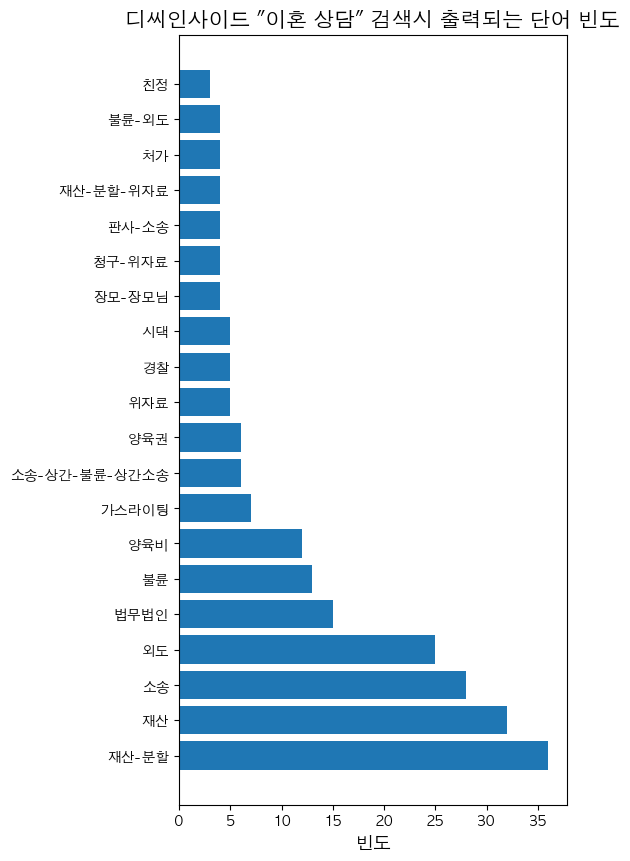

In [128]:
x = df['label'].value_counts()[1:21].index
y = df['label'].value_counts()[1:21].values

plt.figure(figsize=(5,10))
plt.title('디씨인사이드 "이혼 상담" 검색시 출력되는 단어 빈도', size=15)
plt.barh(x,y)
plt.xlabel('빈도', size=13)

# 데이터 분석3 : 주요 키워드 TFIDF

In [132]:
# 재산 or 분할 (둘 중에 하나라도 있으면 됨) 
money = " ".join(df[df['모든글_한글'].str.contains('재산|분할', na=False)]['모든글_한글'].tolist())

# 상간 or 불륜 or 외도  (셋 중에 하나라도 있으면 됨) 
affair = " ".join(df[df['모든글_한글'].str.contains('상간|불륜|외도', na=False)]['모든글_한글'].tolist())

# 전문 or 법무법인  (둘 중에 하나라도 있으면 됨) 
lawyer = " ".join(df[df['모든글_한글'].str.contains('전문|법무법인', na=False)]['모든글_한글'].tolist())

# 양육비 or 양육권  (둘 중에 하나라도 있으면 됨) 
child = " ".join(df[df['모든글_한글'].str.contains('양육비|양육권', na=False)]['모든글_한글'].tolist())

# 가스라이팅 or 경찰 (둘 중에 하나라도 있으면 됨) 
criminal = " ".join(df[df['모든글_한글'].str.contains('가스라이팅|경찰', na=False)]['모든글_한글'].tolist())

# 시댁 or 장모 or 처가 or 친정 (넷 중에 하나라도 있으면 됨) 
parents = " ".join(df[df['모든글_한글'].str.contains('시댁|장모|처가|친정', na=False)]['모든글_한글'].tolist())

docs = [money, affair , lawyer,child , criminal, parents ]

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer().fit(docs)
tfidf_array = tfidf.transform(docs).toarray()
tfidf_voca = tfidf.vocabulary_

df_tfidf = pd.DataFrame(
    tfidf_array, 
    columns = tfidf_voca, 
    index = ['재산-분할','상간-불륜-외도','전문-법무법인','양육비-양육권','가스라이팅-경찰','시댁-장모-처가-친정']
)
df_tfidf.head(1)

,이혼숙려캠프는,이미,솔직히,본래의,취지에서,벗어난지,오래임,출연자들도,본인,탓이긴,...,준비했으나,겁이,선뜻,해인이가,죽을,병에,걸렸다네,드디어,지옥에서,탈출이다
재산-분할,0.01047,0.0,0.0,0.012768,0.0,0.012768,0.012768,0.012768,0.053023,0.0,...,0.012768,0.0,0.0,0.012768,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
df_tfidf.T

,재산-분할,상간-불륜-외도,전문-법무법인,양육비-양육권,가스라이팅-경찰,시댁-장모-처가-친정
이혼숙려캠프는,0.010470,0.013329,0.000000,0.0,0.0,0.000000
이미,0.000000,0.000000,0.000000,0.0,0.0,0.038974
솔직히,0.000000,0.000000,0.010687,0.0,0.0,0.000000
본래의,0.012768,0.000000,0.000000,0.0,0.0,0.000000
취지에서,0.000000,0.000000,0.010687,0.0,0.0,0.000000
...,...,...,...,...,...,...
병에,0.000000,0.013329,0.008763,0.0,0.0,0.000000
걸렸다네,0.000000,0.032509,0.000000,0.0,0.0,0.000000
드디어,0.000000,0.032509,0.000000,0.0,0.0,0.000000
지옥에서,0.000000,0.000000,0.010687,0.0,0.0,0.000000


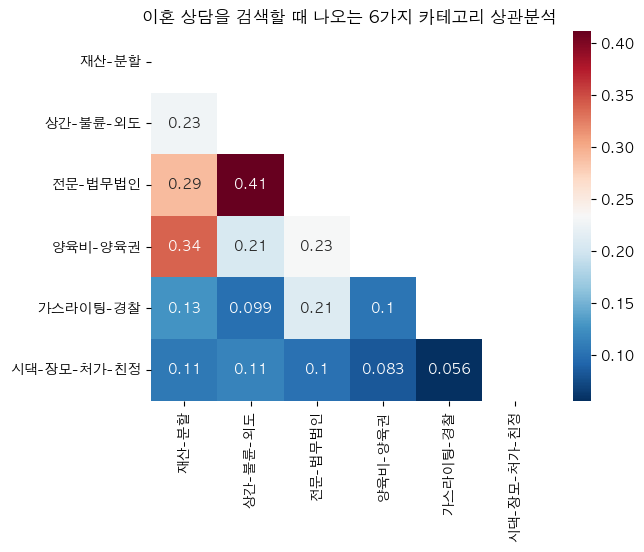

In [164]:
# 상관분석

from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import numpy as np

cos_sim = cosine_similarity(df_tfidf)
mask = np.triu(np.ones_like(cos_sim, dtype=bool))    # 절반 가리기 

sns.heatmap(cos_sim, mask = mask , annot=True, xticklabels=df_tfidf.index, yticklabels=df_tfidf.index, cmap="RdBu_r")
plt.title("이혼 상담을 검색할 때 나오는 6가지 카테고리 상관분석")
plt.show()


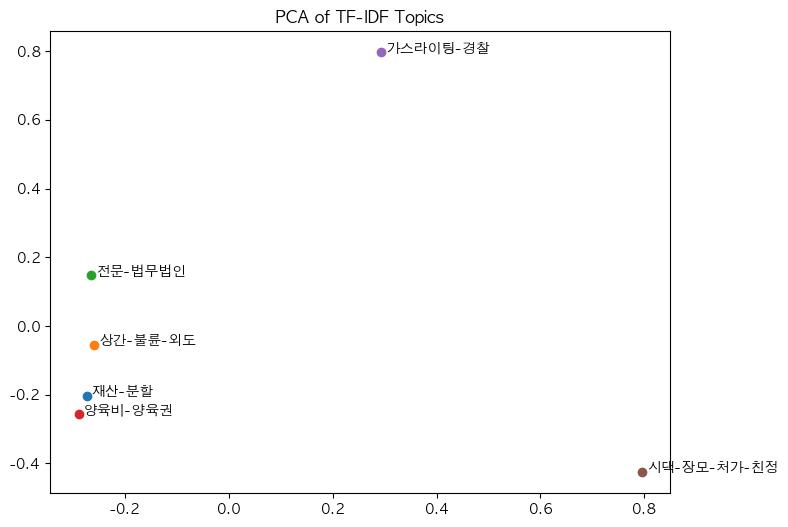

In [158]:
# 차원축소 --> 6개 카테고리별 유사성 확인 

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(df_tfidf)

plt.figure(figsize=(8, 6))
for i, label in enumerate(df_tfidf.index):
    plt.scatter(reduced[i, 0], reduced[i, 1], label=label)
    plt.text(reduced[i, 0]+0.01, reduced[i, 1], label)

plt.title("PCA of TF-IDF Topics")
plt.show()

# 분석 결과

### 1. 검색시 나오는 단어 빈도로 알아보는 관심도
재산 분할이 가장 높은 관심을 받는 주제로 나타났습니다. 이는 이혼과 관련된 법적 분쟁에서 중요한 부분을 차지하며, 이혼 시 재산 분할 문제가 핵심 쟁점으로 다뤄진다는 것을 시사합니다.

외도, 불륜 역시 이혼 상담에서 중요한 관심을 받고 있는 주제입니다. 이는 감정적이고 법적인 문제를 동시에 다루는 주제이므로, 전문적인 법률 상담이 필수적입니다.

양육비도 매우 중요한 관심사로 나타났습니다. 이 주제는 부모 간의 양육권 분쟁과 관련이 있으며, 자녀의 복지와 직결되는 문제로 다뤄지고 있습니다.

가스라이팅, 경찰은 상대적으로 낮은 관심도를 보였으며, 이는 심리적 문제와 법적 조치가 필요한 상황에 대한 관심이 다소 적다는 의미일 수 있습니다.

시댁, 장모님, 처가와 같은 가족 간의 갈등 문제는 법적 분쟁보다는 관계적인 이슈가 강한 것으로 나타났습니다.

### 2. 카테고리별 전문가 신뢰성
상간-불륜-외도와의 상관 관계가 0.42로 가장 높은 수치를 보였으며, 이는 이혼 상담 시 법무법인과 같은 전문가 상담을 찾는 경향이 매우 높다는 것을 나타냅니다. 상간소송과 관련된 법률적 지원을 받고자 하는 고객들이 많음을 시사합니다.

재산-분할과의 상관 관계도 0.29로 상당히 높은 편이며, 이는 이혼 시 재산 분할 문제에 대해 법적 전문가의 조언을 받고자 하는 수요가 있음을 나타냅니다.

양육비-양육권과의 상관 관계는 0.23으로, 양육권 문제는 비교적 덜 중요하게 다뤄지지만 여전히 법적 조언을 받는 고객들이 존재함을 보여줍니다.

### 3. 카테고리별 연관성
가스라이팅-경찰과 시댁-장모-처가-친정은 다른 주제들과 거리가 멀고 낮은 유사도를 보였습니다. 이는 심리적 문제와 가족 간 갈등이 법적 분쟁과는 다소 거리가 있음을 의미합니다. 이러한 주제는 법적 절차보다는 상담이나 중재가 필요한 영역으로 다뤄질 가능성이 높습니다.

양육비-양육권과 재산-분할, 상간-불륜-외도는 서로 가까운 관계를 보이며, 이혼 시 주요 법적 쟁점으로 함께 다뤄지는 경향이 있음을 보여줍니다. 이 문제들은 법적 대응과 협상이 동시에 필요할 수 있습니다.

### 결론
이 분석을 통해, 법무법인은 이혼 상담 시 재산 분할, 양육권, 상간소송과 관련된 법적 문제에서 중요한 역할을 할 수 있습니다. 또한, 가스라이팅과 가족 간 갈등 같은 문제는 법적 대응보다는 심리적, 중재적 접근이 필요할 수 있으며, 이러한 카테고리는 법률 상담 외의 지원이 중요한 영역으로 보입니다.